In [109]:
#Import core libs
import re
import random
import math
import matplotlib.pyplot as plt
import datetime
import os
from operator import add

#Import non-core libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.special
import scipy.stats as stats

#Import Visualization libs
from bokeh.plotting import figure, output_notebook, show
from bokeh.palettes import Category20
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot

## Definición de fuente

In [2]:
#Definimos la fuente del archivo (indicar directorio local)
source = "../../DataSets Grandes/properati2.csv"
data = pd.read_csv(source)

## Análisis exploratorio de datos

In [3]:
#Analizamos las columnas
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [4]:
#Analizamos la forma
data.shape

(121220, 26)

In [5]:
#Vemos los primeros datos
data.head(2)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


In [6]:
#Vemos los nulos del dataset
data.isna().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

## Limpieza de datos

In [469]:
df = data.drop(columns = ["operation","country_name","geonames_id","image_thumbnail","properati_url","lat-lon","price_aprox_local_currency","price_aprox_usd"])

In [470]:
df.shape

(121220, 18)

In [471]:
#Guardo una copia del dataset con nulos
df_with_nan = df

In [472]:
#Hacemos limpieza de los registros que tengan nulo en alguno de los features expresados en el subset, ya que nos interesa tener todos completos, y no podríamos inferirlos
df = df.dropna(subset=['price','property_type', "surface_covered_in_m2","surface_total_in_m2"], how='any')

In [473]:
df.shape

(63352, 18)

In [474]:
df = df[df.currency == "USD"]

In [475]:
df.shape

(55795, 18)

In [476]:
#Filtros
apart = df.property_type == "apartment"
ph = df.property_type == "PH"
house = df.property_type == "house"
store = df.property_type == "store"

In [477]:
ap_price_ol = df[apart]["price"].quantile(0.75) + (1.5 * (df[apart]["price"].quantile(0.75) - df[apart]["price"].quantile(0.25)))
ap_sup_ol = df[apart]["surface_covered_in_m2"].quantile(0.75) + (1.5 * (df[apart]["surface_covered_in_m2"].quantile(0.75) - df[apart]["surface_covered_in_m2"].quantile(0.25)))

In [478]:
ph_price_ol = df[ph]["price"].quantile(0.75) + (1.5 * (df[ph]["price"].quantile(0.75) - df[ph]["price"].quantile(0.25)))
ph_sup_ol = df[ph]["surface_covered_in_m2"].quantile(0.75) + (1.5 * (df[ph]["surface_covered_in_m2"].quantile(0.75) - df[ph]["surface_covered_in_m2"].quantile(0.25)))

In [479]:
ho_price_ol = df[house]["price"].quantile(0.75) + (1.5 * (df[house]["price"].quantile(0.75) - df[house]["price"].quantile(0.25)))
ho_sup_ol = df[house]["surface_covered_in_m2"].quantile(0.75) + (1.5 * (df[house]["surface_covered_in_m2"].quantile(0.75) - df[house]["surface_covered_in_m2"].quantile(0.25)))

In [480]:
st_price_ol = df[store]["price"].quantile(0.75) + (1.5 * (df[store]["price"].quantile(0.75) - df[store]["price"].quantile(0.25)))
st_sup_ol = df[store]["surface_covered_in_m2"].quantile(0.75) + (1.5 * (df[store]["surface_covered_in_m2"].quantile(0.75) - df[store]["surface_covered_in_m2"].quantile(0.25)))

In [481]:
#Guardo copia para análisis exploratorio de los valores elevados
df_high = df[df["surface_covered_in_m2"] > surface_covered_in_m2_ol]
df_high = df[df["price"] > ph_price_ol]

In [482]:
#Limpieza genérica, sin consideración de tipo de propiedad
#surface_covered_in_m2_ol = df["surface_covered_in_m2"].quantile(0.75) + (1.5 * (df["surface_covered_in_m2"].quantile(0.75) - df["surface_covered_in_m2"].quantile(0.25)))

In [483]:
#Limpieza genérica, sin consideración de tipo de propiedad
#df = df[df["surface_covered_in_m2"] < surface_covered_in_m2_ol]

In [484]:
df_ap = df[apart]
df_ap = df_ap[df_ap.price < ap_price_ol]
df_ap = df_ap[df_ap.surface_covered_in_m2 < ap_sup_ol]
#df_ap.describe()

In [485]:
df_ph = df[ph]
df_ph = df_ph[df_ph.price < ph_price_ol]
df_ph = df_ph[df_ph.surface_covered_in_m2 < ph_sup_ol]
#df_ph.describe()

In [486]:
df_ho = df[house]
df_ho = df_ho[df_ho.price < ho_price_ol]
df_ho = df_ho[df_ho.surface_covered_in_m2 < ho_sup_ol]
#df_ho.describe()

In [487]:
df_st = df[store]
df_st = df_st[df_st.price < st_price_ol]
df_st = df_st[df_st.surface_covered_in_m2 < st_sup_ol]
#df_st.describe()

In [488]:
df.shape

(55795, 18)

In [489]:
df_high.shape

(14256, 18)

In [490]:
frames = [df_ap,df_ph,df_ho,df_st]
df = pd.concat(frames)

In [492]:
#Nos quedamos solo con la superficie que guarda relación con la física
df = df[df.surface_covered_in_m2 < df.surface_total_in_m2]

In [493]:
df[df.property_type == "apartment"].isna().sum()

Unnamed: 0                     0
property_type                  0
place_name                     1
place_with_parent_names        0
state_name                     0
lat                         7289
lon                         7289
price                          0
currency                       0
surface_total_in_m2            0
surface_covered_in_m2          0
price_usd_per_m2               0
price_per_m2                   2
floor                      17889
rooms                      11541
expenses                   14772
description                    0
title                          0
dtype: int64

In [494]:
df.shape

(32954, 18)

<AxesSubplot:>

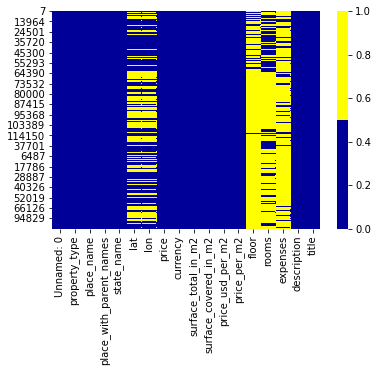

In [495]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [496]:
df.property_type.value_counts()

apartment    19711
house        11105
PH            1835
store          303
Name: property_type, dtype: int64

In [498]:
df_high.property_type.value_counts()

house        7961
apartment    5392
store         740
PH            163
Name: property_type, dtype: int64

<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price'>

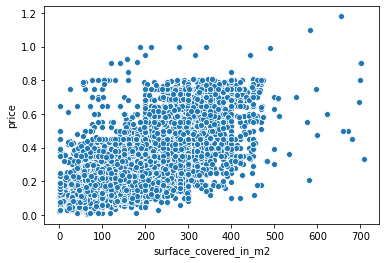

In [499]:
sns.scatterplot(x = "surface_covered_in_m2", y = df.price/1000000, data = df)

<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price'>

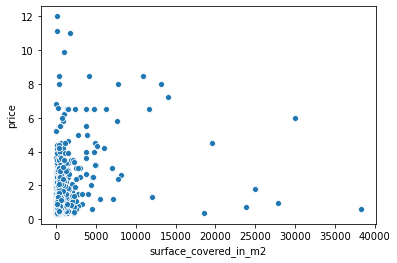

In [500]:
sns.scatterplot(x = "surface_covered_in_m2", y = df_high.price/1000000, data = df_high)

In [501]:
df["price"].max()

1180000.0

In [502]:
df_high["price"].max()

12000000.0

In [504]:
#Analizamos los propiedades con los valores más elevados
df[df["price"]==df["price"].max()].head()

,Unnamed: 0,property_type,place_name,place_with_parent_names,state_name,lat,lon,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
85809,85809,store,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,NaN,NaN,1180000.0,USD,710.0,656.0,1661.971831,1798.780488,NaN,NaN,NaN,VENTA DE HOTEL (fondo de comercio + propiedad)...,VENTA DE HOTEL EN PALERMO 27 Habitaciones c/ba...
86260,86260,store,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,NaN,NaN,1180000.0,USD,710.0,656.0,1661.971831,1798.780488,NaN,NaN,NaN,VENTA DE HOTEL (fondo de comercio + propiedad)...,EDIFICIO PB 3 PISOS 710m2 totales. - HOTEL 2...


<AxesSubplot:xlabel='rooms', ylabel='price'>

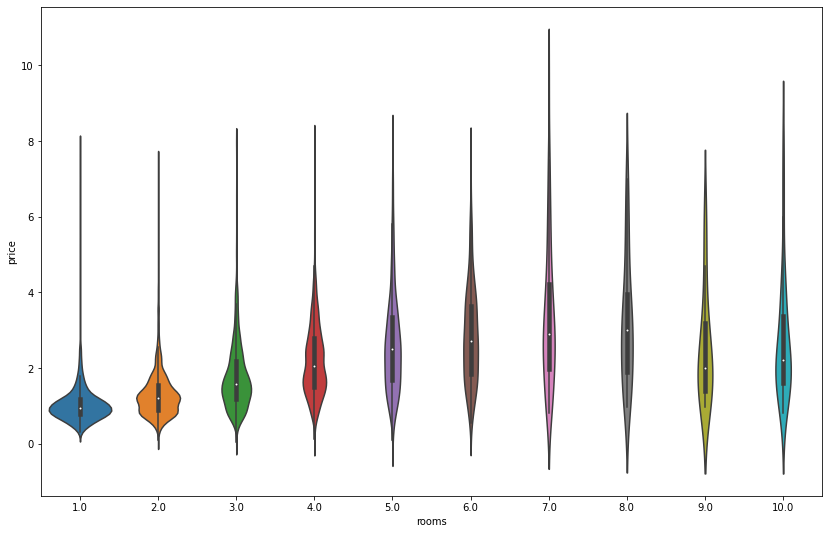

In [508]:
#Analizamos la distribución de los valores de las propiedades del dataset limpio, en relación a la cantidad de rooms
plt.figure(figsize=(14,9))
sns.violinplot(df.rooms[df.rooms<11],df.price/100000)

<AxesSubplot:xlabel='rooms', ylabel='price'>

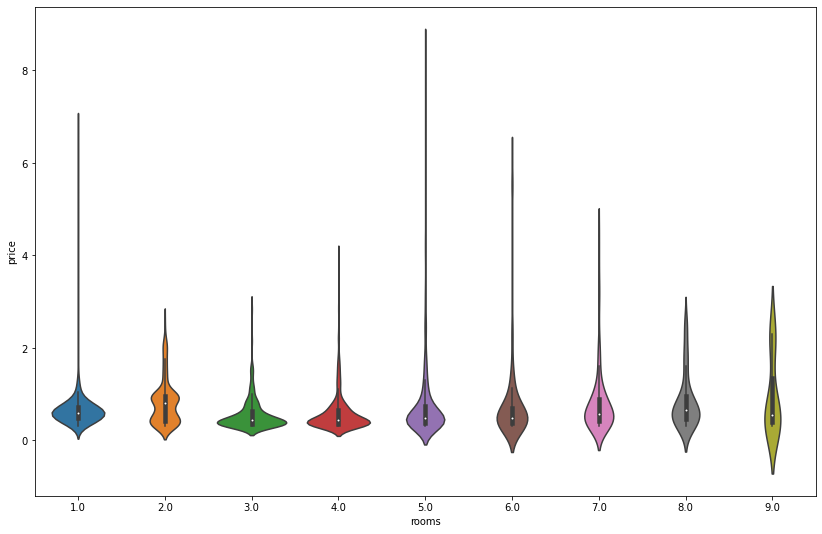

In [510]:
#Analizamos la distribución de los valores de las propiedades más caras en relación a la cantidad de rooms
plt.figure(figsize=(14,9))
sns.violinplot(df_high.rooms[df_high.rooms<10],df_high.price/1000000)

<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price'>

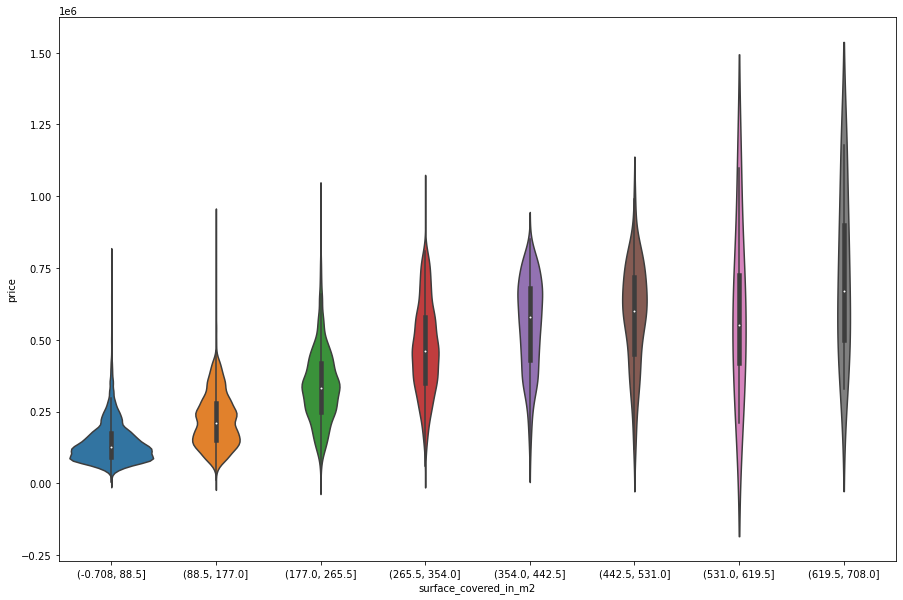

In [511]:
#Analizamos el valor de las propiedadse por rango de metros cuadrados cubiertos
plt.figure(figsize=(15,10))
sns.violinplot(pd.cut(df.surface_covered_in_m2,8),df.price)

In [513]:
#Generamos un df nuevo con menos variables para analizar la relación en un pairplot
df2 = df[["price","property_type","surface_covered_in_m2","rooms"]]

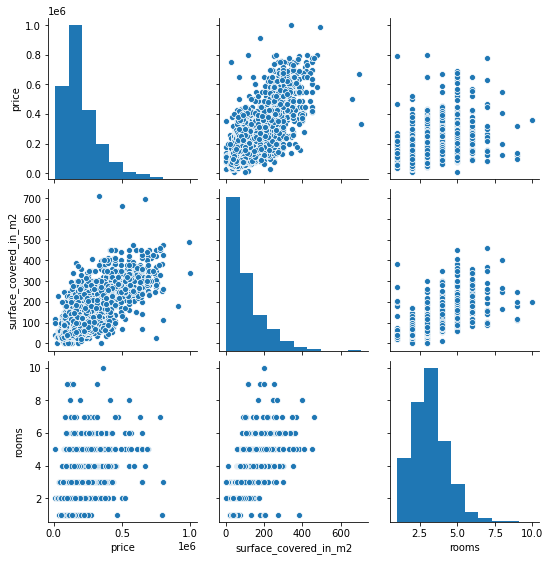

In [514]:
#Analizamos las propiedades del dataset limpio en el pairplot para evaluar si se mantiene una relación lineal de algún tipo
sns.pairplot(df2.sample(5000))

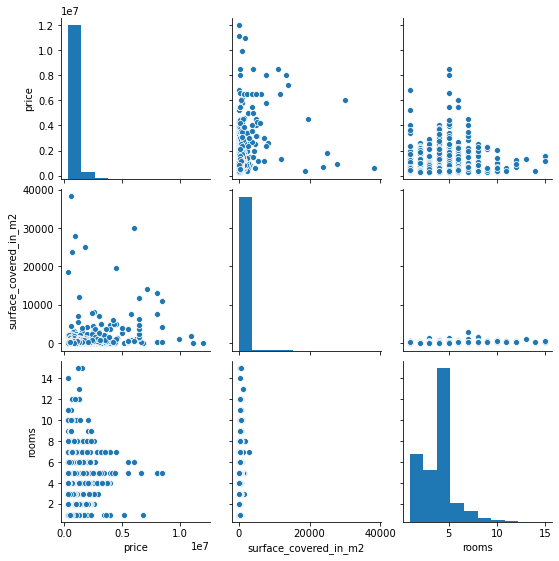

In [515]:
#Analizamos las propiedades más caras en el pairplot para evaluar si se mantiene una relación lineal de algún tipo
df3 = df_high[["price","property_type","surface_covered_in_m2","rooms"]]
sns.pairplot(df3)

<Figure size 864x576 with 0 Axes>

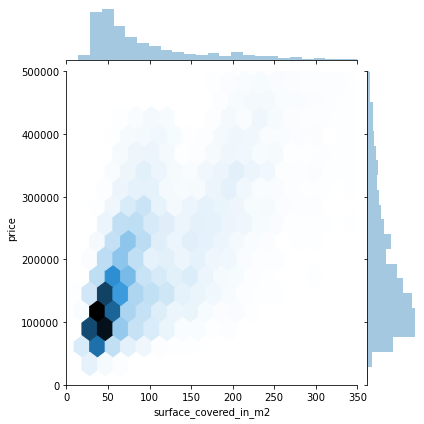

In [531]:
#Generamos un jointplot
plt.figure(figsize=(12,8))
sns.jointplot(x='surface_covered_in_m2', y='price', data=df, kind='hex', 
              gridsize=38, xlim = (0,350), ylim = (0,500000))